In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

Reading the dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/fish_data.csv')
df

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [ ]:
df.isnull().sum()


,0
species,0
length,0
weight,0
w_l_ratio,0


In [ ]:
df.duplicated().sum()

109

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3971 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    3971 non-null   object 
 1   length     3971 non-null   float64
 2   weight     3971 non-null   float64
 3   w_l_ratio  3971 non-null   float64
dtypes: float64(3), object(1)
memory usage: 155.1+ KB


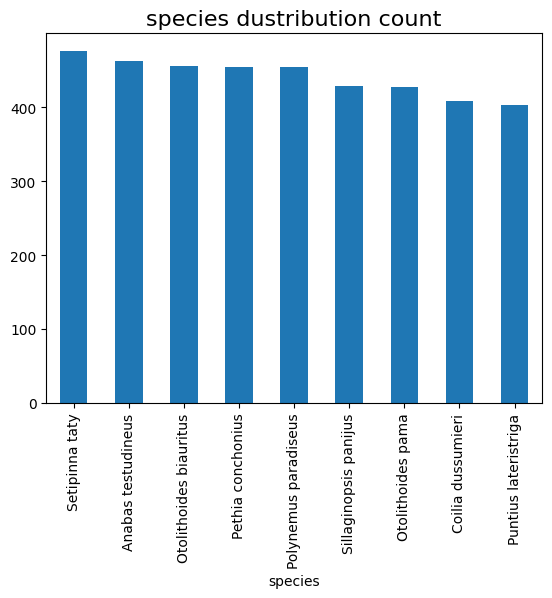

In [ ]:
df['species'].value_counts().plot(kind = 'bar')
plt.title('species dustribution count',fontsize = 16)
plt.xlabel('species')
plt.show()

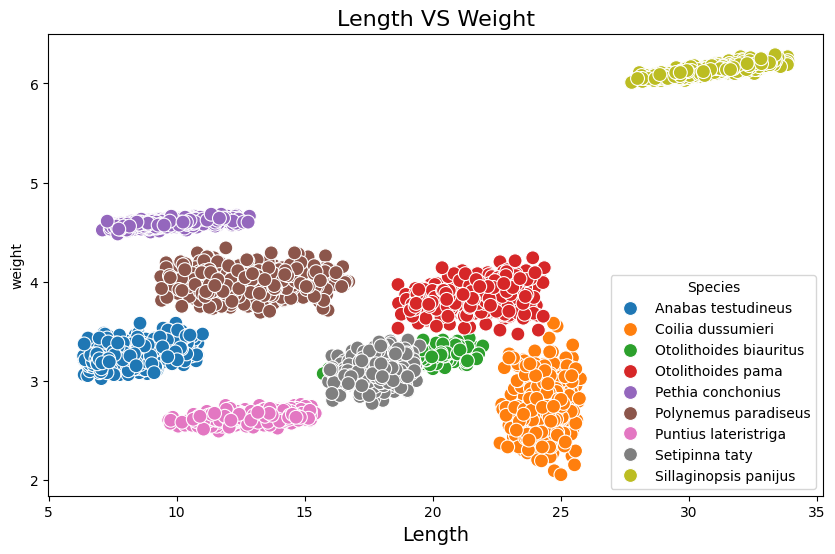

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df , x = 'length',y = 'weight',hue = 'species',s = 100)
plt.title('Length VS Weight', fontsize = 16)
plt.xlabel('Length',fontsize = 14)
plt.ylabel=('weight')
plt.legend(title = 'Species')
plt.show()

Analysing length of the species

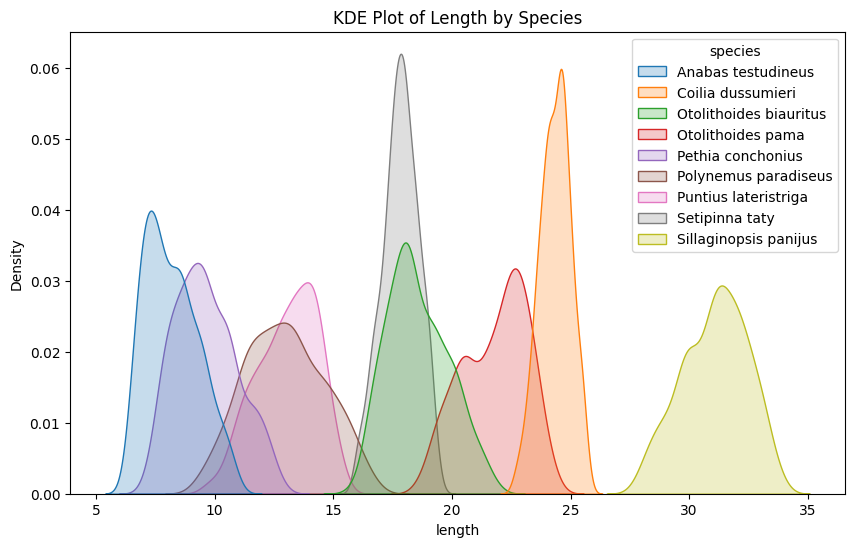

In [ ]:
#Kernel Density Estimation (KDE) Plot
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="length", hue="species",fill=True)
plt.title('KDE Plot of Length by Species')
plt.show()

Analysing weight of species

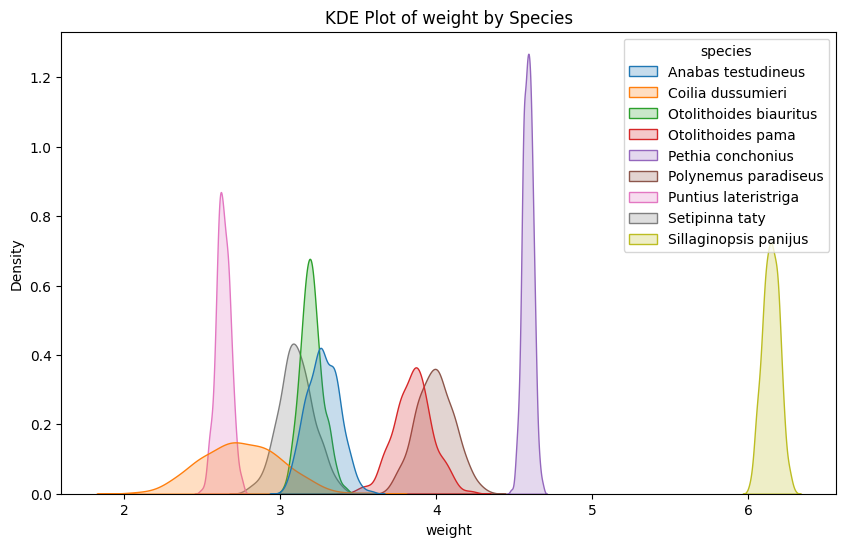

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="weight", hue="species",fill=True)
plt.title('KDE Plot of weight by Species')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
x_train , x_test ,y_train , y_test = train_test_split(df.drop('species',axis = 1), df['species'], test_size = 0.1, random_state = 42)

In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Building the model using decision tree algorithm

In [ ]:
Dt = DecisionTreeClassifier()
Dt.fit(x_train_scaled, y_train)


DecisionTreeClassifier()

In [ ]:
y_pred = Dt.predict(x_test_scaled)


In [ ]:
accuracy_score(y_test , y_pred)

0.9422110552763819

Building the model using random forest lassifier

In [ ]:
Rf = RandomForestClassifier()
Rf.fit(x_train_scaled, y_train)
y_pred1 = Rf.predict(x_test_scaled)

In [ ]:
accuracy_score(y_test , y_pred1)

0.9195979899497487